In [1]:
import numpy as np # linear algebra
import pandas as pd #reading data
from matplotlib import pyplot as plt


In [2]:
#reading data
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head() #preview

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#want data as numpy array to manipulate
data = np.array(data)
m, n = data.shape #m is amount of rows (ex), amount of features +1 (label col) -> dimensions of data
np.random.shuffle(data) #shuffling to introduce randomness

#setting data aside to avoid over-fitting to training data
data_dev = data[0:1000].T #first 1000 ex
Y_dev = data_dev[0] #first row -> labels -> target values 
X_dev = data_dev[1:n]#select the remaining rows ->second row to the last onee
X_dev = X_dev / 255. #normalization step

data_train = data[1000:m].T #data training on
Y_train = data_train[0] #first row in remaining data 
X_train = data_train[1:n]#remaining rows
X_train = X_train/255
_,m_train = X_train.shape #getting number of features/ex in data



In [5]:
X_train[:,0].shape #select all rows which is ":", and 0 selects first col -> .shape returns num of elements 

(784,)

In [6]:
#intializing parameters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5 #intializing weights for layer 1 -> centering around 0 -> break symmetry
    b1 = np.random.rand(10, 1) - 0.5 #intializing biases for layer 1
    W2 = np.random.rand(10, 10) - 0.5 #intialzing weights for layer 2 
    b2 = np.random.rand(10, 1) - 0.5 #intialzing biases for layer 2
    return W1, b1, W2, b2
def ReLU(Z): #activation function -> introduces non-linearity -> x> 0 = Z
    return np.maximum(Z, 0)#go through each element in Z,greater than 0 returns Z,else 0 
    
def softmax(Z):#activation function -> getting probabilities
    return np.exp(Z)/ sum(np.exp(Z)) #e^x for each elemet, np.sum sums through each col, so preserves amount of col, but collapses rows to 1 to get sum

def forward_prop(W1,b1,W2,b2,X): #calc linear transformations for each layer
    Z1 = W1.dot(X)+ b1 #weighted sums for each neuron
    A1 = ReLU(Z1) #apply activation
    Z2 = W2.dot(A1)+b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y): #converts target labels 'Y' into one-hot encoded format -> each label turned into binary
    one_hot_Y = np.zeros((Y.size, Y.max()+1)) #new matrix of zeroes
    one_hot_Y[np.arange(Y.size), Y] = 1 #for each row, go to col Y and set to 1
    one_hot_Y = one_hot_Y.T #flipping -> need each col to be ex
    return one_hot_Y

def deriv_ReLU(Z): #binary matrix returned -> indicates if > 0 -> for computing gradient
    return Z > 0 #if greater than 0, return 1, else 0
    
#figuring out how to improve -> how much each parameter contributed to error/loss
def backward_prop(Z1, A1, Z2, A2,W1, W2, X, Y):
    one_hot_Y = one_hot(Y) #encoding the true outputs into binary form
    dZ2 = A2 - one_hot_Y #comparing predicted output to output
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/ m * dZ1.dot(X.T)
    db1 = 1/ m * np.sum(dZ1)
    return dW1, db1, dW2, db2

#updating the params 
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1
        W2 = W2 - alpha * dW2
        b2 = b2 - alpha * db2
        return W1, b1, W2, b2

    
    

In [7]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/ Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if(i % 10 == 0):
            print("Iterations: ",i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2
                  

In [8]:
W1, b1 ,W2, b2 = gradient_descent(X_train, Y_train,500,0.1)

Iterations:  0
[8 5 2 ... 2 4 2] [1 3 9 ... 2 7 6]
Accuracy:  0.09482926829268293
Iterations:  10
[8 6 9 ... 2 9 2] [1 3 9 ... 2 7 6]
Accuracy:  0.19507317073170732
Iterations:  20
[7 6 9 ... 2 9 2] [1 3 9 ... 2 7 6]
Accuracy:  0.2656829268292683
Iterations:  30
[7 8 9 ... 2 7 2] [1 3 9 ... 2 7 6]
Accuracy:  0.3131707317073171
Iterations:  40
[7 8 9 ... 2 7 2] [1 3 9 ... 2 7 6]
Accuracy:  0.35197560975609754
Iterations:  50
[7 8 9 ... 2 9 2] [1 3 9 ... 2 7 6]
Accuracy:  0.38426829268292684
Iterations:  60
[7 3 9 ... 2 7 2] [1 3 9 ... 2 7 6]
Accuracy:  0.41317073170731705
Iterations:  70
[7 3 9 ... 2 7 2] [1 3 9 ... 2 7 6]
Accuracy:  0.4414390243902439
Iterations:  80
[7 3 7 ... 2 7 2] [1 3 9 ... 2 7 6]
Accuracy:  0.47917073170731705
Iterations:  90
[1 3 7 ... 2 7 2] [1 3 9 ... 2 7 6]
Accuracy:  0.5337560975609756
Iterations:  100
[1 3 7 ... 2 7 1] [1 3 9 ... 2 7 6]
Accuracy:  0.5874390243902439
Iterations:  110
[1 3 9 ... 2 7 2] [1 3 9 ... 2 7 6]
Accuracy:  0.6171707317073171
Iteration

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


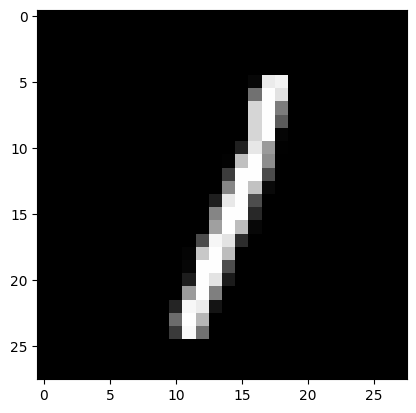

Prediction:  [3]
Label:  3


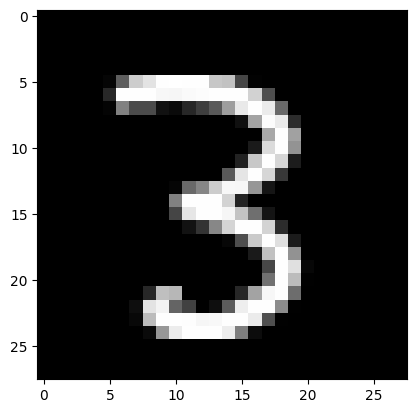

Prediction:  [9]
Label:  9


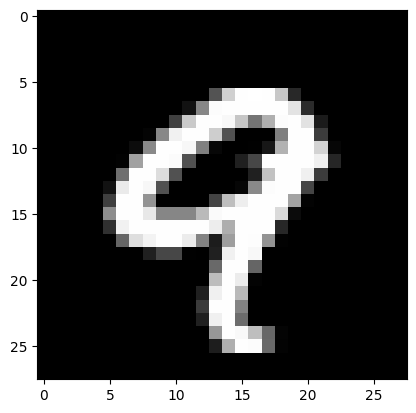

Prediction:  [1]
Label:  1


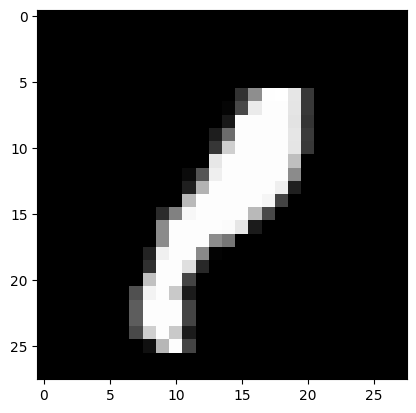

In [10]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)